<a href="https://colab.research.google.com/github/Rohit6458/-ASRA--AN-INNOVATIVE-ONLINE-PLATFORM-FOR-INTERCONNECTING-THE-CIVIL-ENGINEERING-COMMUNITY/blob/main/DP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential, layers

In [ ]:
train = pd.read_csv("Google_Stock_Price_Train.csv")["Open"]
test = pd.read_csv("Google_Stock_Price_Test.csv")["Open"]

In [ ]:
train

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [ ]:
test

0     778.81
1     788.36
2     786.08
3     795.26
4     806.40
5     807.86
6     805.00
7     807.14
8     807.48
9     807.08
10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64

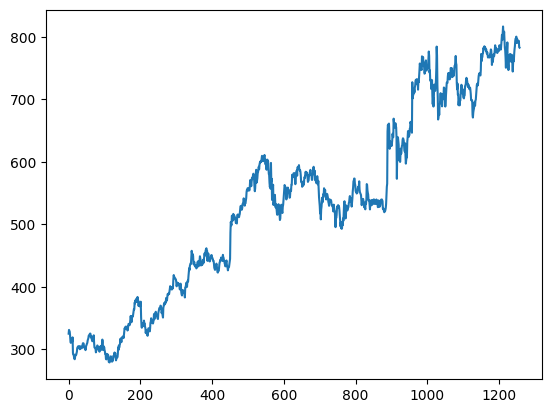

In [ ]:
plt.plot(train)

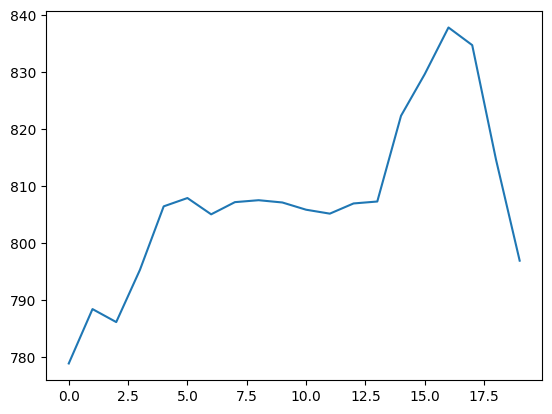

In [ ]:
plt.plot(test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
train = scaler.fit_transform(train.to_frame()).reshape((len(train)))
test = scaler.transform(test.to_frame()).reshape((len(test)))

In [ ]:
xtrain, ytrain = [], []
for i in range(60, len(train)):
    xtrain.append(train[i-60:i])
    ytrain.append(train[i])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [ ]:
xtrain[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [ ]:
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1],1))

In [ ]:
xtrain.shape


(1198, 60, 1)

In [ ]:
ytrain.shape


(1198,)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
def build_model(d):
    return Sequential([layers.Input(shape=(60,1)),
                       layers.LSTM(32),
                       layers.Dropout(d),
                       layers.Dense(16, activation="relu"),
                       layers.BatchNormalization(),
                       layers.Dense(1)],
                      name="StockLSTM")
model = build_model(0.2)
model.summary()
path="model.hdf5"
checkpoint = ModelCheckpoint(filepath=path, monitor="MAPE", verbose=1, save_best_only=True, mode='min')
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.losses.MeanAbsolutePercentageError(name="MAPE")])

Model: "StockLSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,929
Non-trainable params: 32
______________________________________________________

In [ ]:
model.fit(xtrain, ytrain, epochs=100, batch_size=32, callbacks=[checkpoint])


Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 0.3684 - MAPE: 348504.9062
Epoch 1: MAPE improved from inf to 348504.90625, saving model to model.hdf5
38/38 [==============================] - 5s 33ms/step - loss: 0.3684 - MAPE: 348504.9062
Epoch 2/100
37/38 [============================>.] - ETA: 0s - loss: 0.0929 - MAPE: 182948.7188
Epoch 2: MAPE improved from 348504.90625 to 178135.84375, saving model to model.hdf5
38/38 [==============================] - 1s 26ms/step - loss: 0.0930 - MAPE: 178135.8438
Epoch 3/100
37/38 [============================>.] - ETA: 0s - loss: 0.0307 - MAPE: 111842.9766
Epoch 3: MAPE improved from 178135.84375 to 108900.69531, saving model to model.hdf5
38/38 [==============================] - 1s 26ms/step - loss: 0.0308 - MAPE: 108900.6953
Epoch 4/100
37/38 [============================>.] - ETA: 0s - loss: 0.0173 - MAPE: 29390.8320
Epoch 4: MAPE improved from 108900.69531 to 28617.95703, saving model to model.hdf5
38/38 [=============

In [ ]:
model.load_weights("./model.hdf5")


In [ ]:
for_pred=np.hstack([train[len(train)-60:len(train)], test])


In [ ]:
ypred = []
for i in range(20):
    inp = for_pred[i:i+60].reshape(1,60,1)
    ypred.append(model.predict(inp)[0,0])

1/1 [==============================] - 0s 24ms/step


In [ ]:
ypred


[0.92784977,
 0.92165875,
 0.92319274,
 0.9233933,
 0.92937756,
 0.940933,
 0.95048875,
 0.95551395,
 0.96005565,
 0.9632197,
 0.964879,
 0.96491474,
 0.9641527,
 0.9644131,
 0.964657,
 0.9738966,
 0.98528475,
 0.99843997,
 1.0058638,
 0.9983515]

In [ ]:
test


array([0.92955205, 0.94731751, 0.94307612, 0.96015329, 0.98087655,
       0.98359253, 0.97827219, 0.98225314, 0.98288563, 0.98214153,
       0.979779  , 0.97849542, 0.98182528, 0.98245777, 1.01045465,
       1.02407173, 1.03930724, 1.03354044, 0.99624228, 0.9631297 ])

In [ ]:
from sklearn.metrics import r2_score


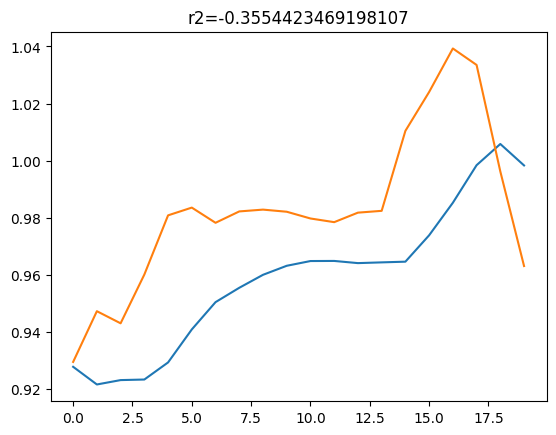

In [ ]:
plt.plot(ypred)
plt.plot(test)
plt.title(f"r2={r2_score(test, np.array(ypred))}")
plt.show()

In [ ]:
ypred


[0.92784977,
 0.92165875,
 0.92319274,
 0.9233933,
 0.92937756,
 0.940933,
 0.95048875,
 0.95551395,
 0.96005565,
 0.9632197,
 0.964879,
 0.96491474,
 0.9641527,
 0.9644131,
 0.964657,
 0.9738966,
 0.98528475,
 0.99843997,
 1.0058638,
 0.9983515]